In [4]:
%run functions_for_ESR_data_processing.ipynb
%matplotlib inline

compound = 'Na'

if compound == 'Li':
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\LiCuFe2(VO4)3 powder\\X-band\\21_02_2019"
else:
    folder = "C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\NaCuFe2(VO4)3 powder\\X-band\\19_02_2019"
    
filename1 = folder+'\\python fits\\initialguess.txt'
filename2 = folder+'\\python fits\\python_fit_results_single_Lor_phase_mixing.txt'
filename3 = folder+'\\python fits\\python_fit_results.txt'


if compound == 'Li':
    Tn, B0n, dB0n, gamman, dgamman, An, dAn, ln, dln, mn, dmn, nn, dnn, freqn  = data_import(filename1, 3)
    Tw, B0w, dB0w, gammaw, dgammaw, Aw, dAw, lw, dlw, mw, dmw, nw, dnw, freqw, mixing_anglew, danglew = data_import(filename2, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, l, dl, m, dm, n, dn, freq = data_import(filename3, 3)
else:
    Tn, B0n, dB0n, gamman, dgamman, An, dAn, ln, dln, mn, dmn, nn, dnn, freqn  = data_import(filename1, 3)
    Tw, B0w, dB0w, gammaw, dgammaw, Aw, dAw, lw, dlw, mw, dmw, nw, dnw, freqw, mixing_anglew, danglew = data_import(filename2, 3)
    T, B01, dB01, gamma1, dgamma1, A1, dA1, B02, dB02, gamma2, dgamma2, A2, dA2, B03, dB03, gamma3, dgamma3, A3, dA3, l, dl, m, dm, n, dn, freq = data_import(filename3, 3)

def temperature (name):
    start = name.find('_')
    end = name.find('K')
    
    temp = name[start+1:end]
    if temp.find('p') == -1:
        temp_new = temp
    else:
        middle = temp.find('p')
        temp_new = temp[:middle] + '.' + temp[middle+1:]
    temp_new = str("%.1f" % float(temp_new))
    return temp_new+' K'

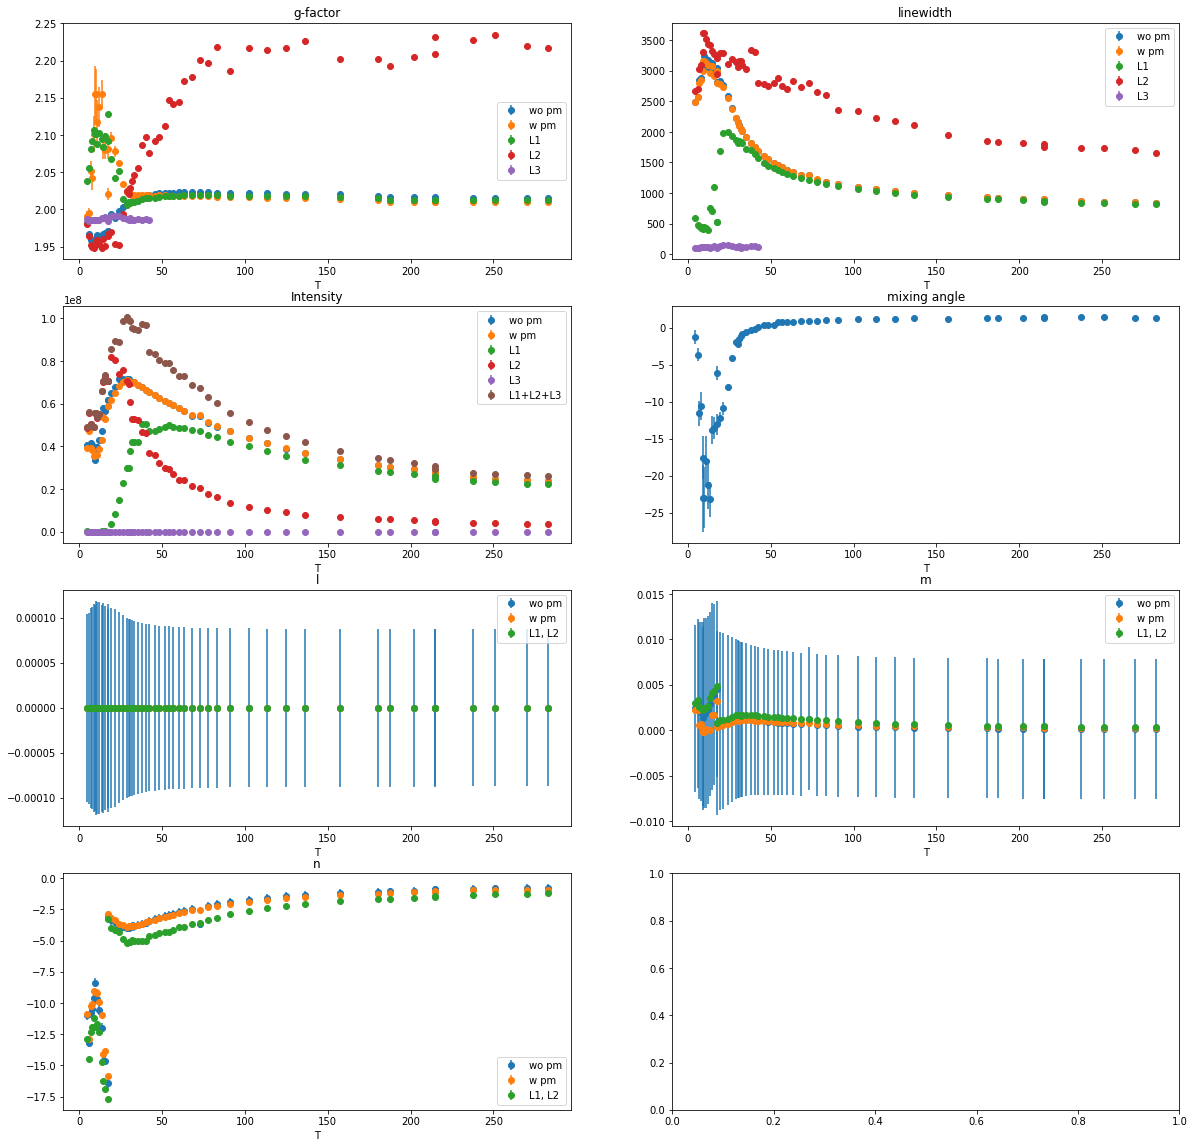

In [5]:
fig, axes = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(20,20))

gn, dgn = [10000*freqn/B0n/13.98, 10000*freqn*np.sqrt(dB0n)/B0n/B0n/13.98]
gw, dgw = [10000*freqw/B0w/13.98, 10000*freqw*np.sqrt(dB0w)/B0w/B0w/13.98]
g1, dg1 = [10000*freq/B01/13.98, 10000*freq*np.sqrt(dB01)/B01/B01/13.98]
g2, dg2 = [10000*freq/B02/13.98, 10000*freq*np.sqrt(dB02)/B02/B02/13.98]
if compound == 'Na':
    g3, dg3 = [10000*freq/B03/13.98, 10000*freq*np.sqrt(dB03)/B03/B03/13.98]

axes[0,0].set_title('g-factor')
axes[0,0].set_xlabel('T')
axes[0,0].errorbar(Tn, gn, yerr=dgn, fmt = 'o')
axes[0,0].errorbar(Tw, gw, yerr=dgw, fmt = 'o')
axes[0,0].errorbar(T, g1, yerr=dg1, fmt = 'o')
axes[0,0].errorbar(T, g2, yerr=dg2, fmt = 'o')
axes[0,0].legend(['wo pm', 'w pm', 'L1', 'L2'])
if compound == 'Na':
    axes[0,0].errorbar(T, g3, yerr=dg3, fmt = 'o')
    axes[0,0].legend(['wo pm', 'w pm', 'L1', 'L2', 'L3'])


axes[0,1].set_title('linewidth')
axes[0,1].set_xlabel('T')
axes[0,1].errorbar(Tn, gamman, yerr=np.sqrt(dgamman), fmt = 'o')
axes[0,1].errorbar(Tw, gammaw, yerr=np.sqrt(dgammaw), fmt = 'o')
axes[0,1].errorbar(T, gamma1, yerr=np.sqrt(dgamma1), fmt = 'o')
axes[0,1].errorbar(T, gamma2, yerr=np.sqrt(dgamma2), fmt = 'o')
if compound == 'Na':
    axes[0,1].errorbar(T, gamma3, yerr=np.sqrt(dgamma3), fmt = 'o')
axes[0,1].legend(['wo pm', 'w pm', 'L1', 'L2', 'L3'])


In, dIn = rescale_A(An, np.sqrt(dAn), compound)
Iw, dIw = rescale_A(Aw, np.sqrt(dAw), compound)
I1, dI1 = rescale_A(A1, np.sqrt(dA1), compound)
I2, dI2 = rescale_A(A2, np.sqrt(dA2), compound)
if compound == 'Na':
    I3, dI3 = rescale_A(A3, np.sqrt(dA3), compound)
    I3 = np.append(np.array([i for i in I3 if np.isnan(i)==False]), np.zeros(len(I3)-len([i for i in I3 if np.isnan(i)==False])))
    dI3 = np.append(np.array([i for i in dI3 if np.isnan(i)==False]), np.zeros(len(dI3)-len([i for i in dI3 if np.isnan(i)==False])))
    A3 = np.append(np.array([i for i in A3 if np.isnan(i)==False]), np.zeros(len(A3)-len([i for i in A3 if np.isnan(i)==False])))
    dA3 = np.append(np.array([i for i in dA3 if np.isnan(i)==False]), np.zeros(len(dA3)-len([i for i in dA3 if np.isnan(i)==False])))

axes[1,0].set_title('Intensity')
axes[1,0].errorbar(Tn, In, yerr=dIn, fmt = 'o')
axes[1,0].errorbar(Tw, Iw, yerr=dIw, fmt = 'o')
axes[1,0].errorbar(T, I1, yerr=dI1, fmt = 'o')
axes[1,0].errorbar(T, I2, yerr=dI2, fmt = 'o')
axes[1,0].set_xlabel('T')
if compound == 'Na':
    axes[1,0].errorbar(T, I3, yerr=dI3, fmt = 'o')
    axes[1,0].errorbar(T, I1+I2+I3, yerr=np.sqrt(dI1**2+dI2**2), fmt = 'o')
    axes[1,0].legend(['wo pm', 'w pm', 'L1', 'L2', 'L3', 'L1+L2+L3'])
else:
    axes[1,0].errorbar(T, I1+I2, yerr=np.sqrt(dI1**2+dI2**2), fmt = 'o')
    axes[1,0].legend(['wo pm', 'w pm', 'L1', 'L2', 'L1+L2'])


axes[1,1].set_title('mixing angle')
axes[1,1].errorbar(Tw, mixing_anglew, yerr=np.sqrt(danglew), fmt = 'o') 
axes[1,1].set_xlabel('T')
    

axes[2,0].set_title('l')
axes[2,0].set_xlabel('T')
axes[2,0].errorbar(Tn, ln, yerr=np.sqrt(dln), fmt = 'o')
axes[2,0].errorbar(Tw, lw, yerr=np.sqrt(dlw), fmt = 'o')
axes[2,0].errorbar(T, l, yerr=np.sqrt(dl), fmt = 'o')
axes[2,0].legend(['wo pm', 'w pm', 'L1, L2'])


axes[2,1].set_title('m')
axes[2,1].set_xlabel('T')
axes[2,1].errorbar(Tn, mn, yerr=np.sqrt(dmn), fmt = 'o')
axes[2,1].errorbar(Tw, mw, yerr=np.sqrt(dmw), fmt = 'o')
axes[2,1].errorbar(T, m, yerr=np.sqrt(dm), fmt = 'o')
axes[2,1].legend(['wo pm', 'w pm', 'L1, L2'])


axes[3,0].set_title('n')
axes[3,0].set_xlabel('T')
axes[3,0].errorbar(Tn, nn, yerr=np.sqrt(dnn), fmt = 'o')
axes[3,0].errorbar(Tw, nw, yerr=np.sqrt(dnw), fmt = 'o')
axes[3,0].errorbar(T, n, yerr=np.sqrt(dn), fmt = 'o')
axes[3,0].legend(['wo pm', 'w pm', 'L1, L2'])

plt.show()

In [ ]:
destination_folder = 'C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\MasterThesis_figures\\'

################################################### g-factor
data = [T, gn, dgn, gw, dgw, g1, dg1, g2, dg2]#, g3, dg3]        
names = [k for k in np.append(np.array(['T']), np.array(['g' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['' for i in np.arange(len(data)-1)]))]
comments = ['', 'wo pm', 'wo pm', 'w pm', 'w pm', 'L1', 'L1', 'L2', 'L2']#, 'L3', 'L3']
destination_name = 'g-factor'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )


################################################### line width                  
data = [T, gamman, np.sqrt(dgamman), gammaw, np.sqrt(dgammaw), gamma1, np.sqrt(dgamma1), gamma2, np.sqrt(dgamma2)]#, gamma3, np.sqrt(dgamma3)]        
names = [k for k in np.append(np.array(['T']), np.array(['line width' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['G' for i in np.arange(len(data)-1)]))]
comments = ['', 'wo pm', 'wo pm', 'w pm', 'w pm', 'L1', 'L1', 'L2', 'L2']#, 'L3', 'L3']
destination_name = 'line width'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )


################################################### intensity rescaled   
data = [T, In, dIn, Iw, dIw, I1+I2, np.sqrt(dI1**2+dI2**2), I1, dI1, I2, dI2]#, I3, dI3]        
names = [k for k in np.append(np.array(['T']), np.array(['intensity' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['a.u.' for i in np.arange(len(data)-1)]))]
comments = ['', 'wo pm', 'wo pm', 'w pm', 'w pm', 'L1+L2', 'L1+L2', 'L1', 'L1', 'L2', 'L2']#, 'L3', 'L3']
destination_name = 'intensity_rescaled'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )


################################################### intensity not rescaled   
data = [T, An, np.sqrt(dAn), Aw, np.sqrt(dAw), A1+A2, np.sqrt(dA1+dA2), A1, np.sqrt(dA1), A2, np.sqrt(dA2)]#, A3, np.sqrt(dA3)]        
names = [k for k in np.append(np.array(['T']), np.array(['intensity' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['a.u.' for i in np.arange(len(data)-1)]))]
comments = ['', 'wo pm', 'wo pm', 'w pm', 'w pm', 'L1 + L2', 'L1 + L2', 'L1', 'L1', 'L2', 'L2']#, 'L3', 'L3']
destination_name = 'intensity_not_rescaled'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )


################################################### mixing_angle 
data = [T, mixing_anglew, np.sqrt(danglew)]        
names = [k for k in np.append(np.array(['T']), np.array(['mixing angle' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['degree' for i in np.arange(len(data)-1)]))]
comments = ['', '', '']
destination_name = 'mixing angle'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )


################################################### l
data = [T, ln, np.sqrt(dln), lw, np.sqrt(dlw), l, np.sqrt(dl)]        
names = [k for k in np.append(np.array(['T']), np.array(['l' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['a.u.' for i in np.arange(len(data)-1)]))]
comments = ['', 'wo pm', 'wo pm', 'w pm', 'w pm', 'L1, L2', 'L1, L2']
destination_name = 'l'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )


################################################### m
data = [T, mn, np.sqrt(dmn), mw, np.sqrt(dmw), m, np.sqrt(dm)]        
names = [k for k in np.append(np.array(['T']), np.array(['m' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['a.u.' for i in np.arange(len(data)-1)]))]
comments = ['', 'wo pm', 'wo pm', 'w pm', 'w pm', 'L1, L2', 'L1, L2']
destination_name = 'm'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )


################################################### n
data = [T, nn, np.sqrt(dnn), nw, np.sqrt(dnw), n, np.sqrt(dn)]        
names = [k for k in np.append(np.array(['T']), np.array(['n' for i in np.arange(len(data)-1)]))]
units = [k for k in np.append(np.array(['K']), np.array(['a.u.' for i in np.arange(len(data)-1)]))]
comments = ['', 'wo pm', 'wo pm', 'w pm', 'w pm', 'L1, L2', 'L1, L2']
destination_name = 'n'

save(data, names, units, comments, destination_folder+compound+'_'+destination_name+'.txt' )

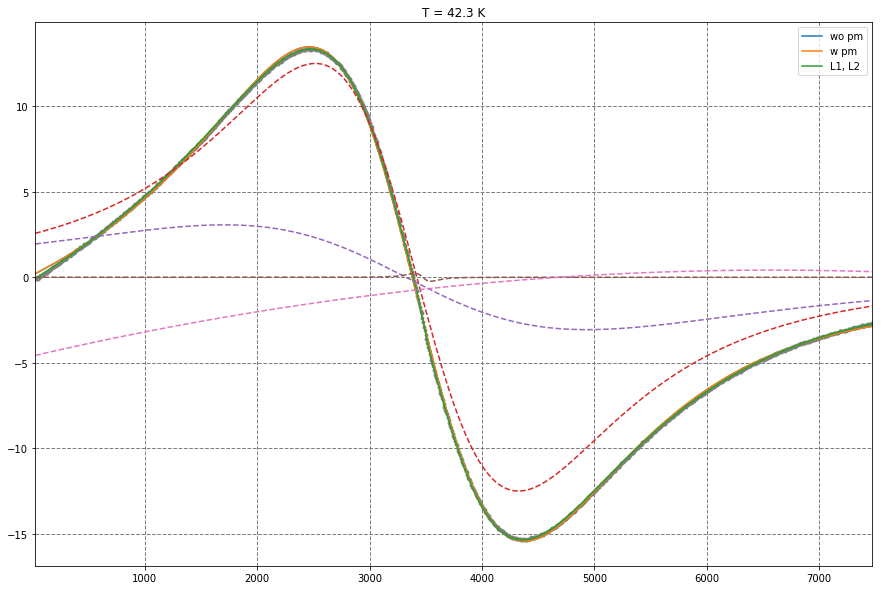

In [36]:
temp = 42.3
i = np.arange(len(T))[ (abs(T-temp)-min(abs(T-temp))) < 0.01 ][0]
#i = 26

def background (field, l, m, n):
    return l*field**2 + m*field + n

files = np.array([i for i in os.listdir(folder) if i.find('processed')!=-1])
Temp = np.array([float(temperature(name)[:-2]) for name in files])
files = files[Temp.argsort()]

field, amp = data_import(folder+'\\'+files[i], 3)

Ln = one_Lor(field, B0n[i], An[i], gamman[i]) + background (field, ln[i], mn[i], nn[i])
Lw = one_Lor_derivative_w_phase(field, B0w[i], Aw[i], gammaw[i], mixing_anglew[i]) + background (field, lw[i], mw[i], nw[i])

L1 = one_Lor(field, B01[i], A1[i], gamma1[i])
L2 = one_Lor(field, B02[i], A2[i], gamma2[i])
L3 = one_Lor(field, B03[i], A3[i], gamma3[i])
bg = background (field, l[i], m[i], n[i])
L = L1 + L2 + L3 + bg

plt.figure(figsize=(15,10))

plt.scatter(field, amp, s=8, c = 'gray')
plt.plot(field, Ln)
plt.plot(field, Lw)
plt.plot(field, L)

plt.plot(field, L1, '--')
plt.plot(field, L2, '--')
plt.plot(field, L3, '--')
plt.plot(field, bg, '--')

plt.legend(['wo pm', 'w pm', 'L1, L2'])

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title('T = '+str(T[i])+' K')
plt.xlim([min(field), max(field)])



data = [field/10000, amp, Ln, Lw, L, amp-bg, L1, L2, L3, L1+L2+L3, bg]        
names = ['B', 'Exp', 'fit wo pm', 'fit w pm', 'fit L1, L2', 'Exp minus background', 'L1', 'L2', 'L3', 'L123', 'background L1, L2']
units = ['T', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.']
comments = [str(T[i])+' K', 'Exp', 'wo pm', 'w pm', 'L1+L2+L3', 'Exp minus background', 'L1', 'L2', 'L3', 'L1 + L2 + L3', 'background']
destination_folder = 'C:\\Users\\F25_1.307_b\\Box Sync\\Klingeler_Masterarbeit\\howardevansite\\MasterThesis_figures\\'
destination_name = compound+'\\individual_temepratures\\'+ compound + '_' +str(T[i])+'_K.txt'

#save(data, names, units, comments, destination_folder+destination_name )